In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

In [3]:
data = load_diabetes(False)

# Background

Diabetes melitus is a group of metabolic disorders where the blood sugar levels are higher than the normal for prolonged period of time. Diabetes is caused either due to the insufficient insulin in the body or due to improper response of the body's cells to insulin.

Diabetes is especially hard on women as it can effect both mother and their unborn children during pregnancy.

# Dataset

Data contains data of 768 females of which 268 females were diangosed with Diabetes. Information available includes 8 variables, such as age, number of pregnancies, Glucose, insulin etc. Response variable is in the dataset is a binary classifier, Outcome, that indicates if the person was diagnosed with Diabetes or not

# Load the dataset

In this tutorial, we are going to use the Pima Indians Datasets. This is standard machine learning dataset available for free download from UCI machine learning library. It describes patient medical record for Pima Indians and whether they had an onset of diabetes with 5 years. 

**Predict the occurence of diabetes among the women in community of pima in Arizona.**

Here are the variables
1. Pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diabetes blood pressure
4. Triceps skip fold thickness
5. Insulin
6. Body mass index
7. pedigree
8. Age
9. Class, onset of diabetes with 5 years

In [4]:
names = ['Preg','Glu','Dias','Tric','Ins','Bmi','Ped','Age','Target']

In [5]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv",header=None,names=names)

In [6]:
diabetes.head()

,Preg,Glu,Dias,Tric,Ins,Bmi,Ped,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory data analysis

In [9]:
a = bp['Preg']['boxes'][0]

In [14]:
bp['Preg']

{'boxes': [<matplotlib.patches.PathPatch at 0x10ae10a90>,
 'caps': [<matplotlib.lines.Line2D at 0x10ade6320>,
 'fliers': [<matplotlib.lines.Line2D at 0x10ade6f98>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10ade6b70>,
 'whiskers': [<matplotlib.lines.Line2D at 0x10ae10cf8>,
  <matplotlib.lines.Line2D at 0x10b44c160>]}

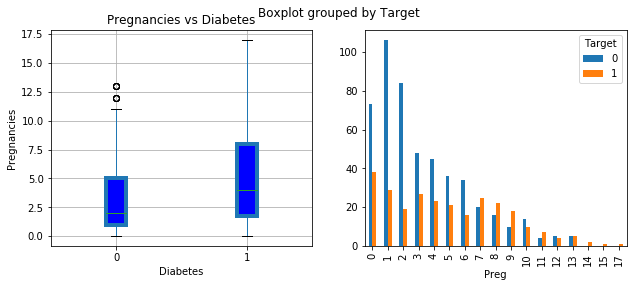

In [31]:
# Number of pregnancies vs diabetes

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

bp = diabetes.boxplot(column=['Preg'], by=['Target'],ax=ax1, return_type="dict", patch_artist=True)

# Box plot style adjustments
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]


[[item.set_facecolor('blue') for item in bp[key]['boxes']] for key in bp.keys()]

ax1.set_title("Pregnancies vs Diabetes")
ax1.set_xlabel("Diabetes")
ax1.set_ylabel("Pregnancies")

diabetes.groupby(['Preg','Target']).size().unstack(fill_value=0).plot.bar(width=0.5, align='center',ax=ax2)
#[[item.set_facecolor('blue') for item in bp[key]['fliers']] for key in bp.keys()]

More pregnancies lead to more diabetes

# Glucose

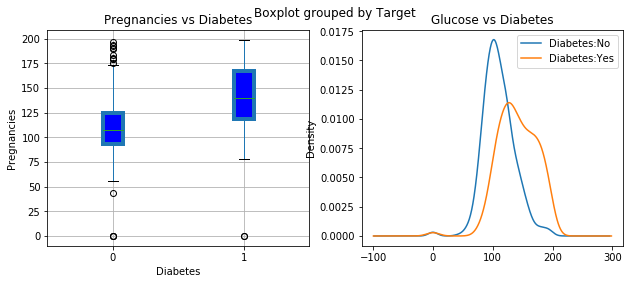

In [47]:
# Number of pregnancies vs diabetes

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

bp = diabetes.boxplot(column=['Glu'], by=['Target'],ax=ax1, return_type="dict", patch_artist=True)

# Box plot style adjustments
[[item.set_linewidth(4) for item in bp[key]['boxes']] for key in bp.keys()]
[[item.set_linewidth(4) for item in bp[key]['fliers']] for key in bp.keys()]


[[item.set_facecolor('blue') for item in bp[key]['boxes']] for key in bp.keys()]

ax1.set_title("Pregnancies vs Diabetes")
ax1.set_xlabel("Diabetes")
ax1.set_ylabel("Pregnancies"),

ax = diabetes.groupby(['Target'])['Glu'].plot.kde(title='Glucose vs Diabetes',)
ax[0].legend(['Diabetes:No','Diabetes:Yes'])

With more glucose value, more chances to get diabetes

# Insulin

Again, no clear difference can be observed between the categories of women in the data, indicating insulin may not be a good predictor of the response variable

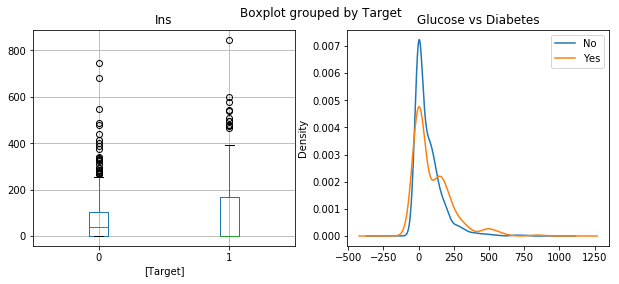

In [52]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

diabetes.boxplot(column=['Ins'],by=['Target'], ax=ax1)
ax = diabetes.groupby(['Target'])['Ins'].plot.kde(title='Glucose vs Diabetes',ax=ax2)
ax[0].legend(['No','Yes'])

# BMI

Target
0    AxesSubplot(0.536364,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
Name: Bmi, dtype: object

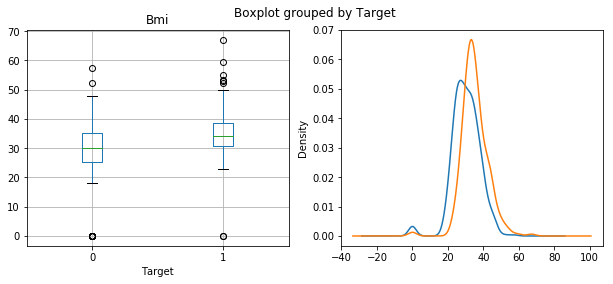

In [57]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(10,4))

diabetes.boxplot(column=['Bmi'],by='Target',ax=ax1)
diabetes.groupby('Target')['Bmi'].plot.kde()

BMI is little less but still useful in prediction

# Scatter plots

Can we improve prediction if we use both the predictors

In [61]:
diabetes.Target = diabetes.Target.astype('category')

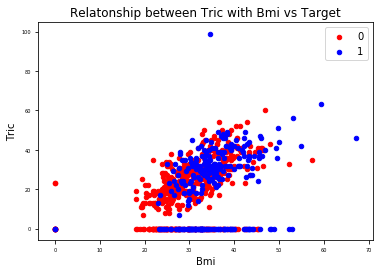

In [73]:
grouped = diabetes.groupby('Target')
fig, ax = plt.subplots()
colors={0:'red', 1:'blue'}
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='Bmi',y='Tric', label=key, color=colors[key], title='Relatonship between Tric with Bmi vs Target',fontsize=5)


# correlation

In [74]:
corr = diabetes.corr()
corr.style.background_gradient(cmap='coolwarm')


,Preg,Glu,Dias,Tric,Ins,Bmi,Ped,Age
Preg,1,0.129459,0.141282,-0.0816718,-0.0735346,0.0176831,-0.0335227,0.544341
Glu,0.129459,1,0.15259,0.0573279,0.331357,0.221071,0.137337,0.263514
Dias,0.141282,0.15259,1,0.207371,0.0889334,0.281805,0.0412649,0.239528
Tric,-0.0816718,0.0573279,0.207371,1,0.436783,0.392573,0.183928,-0.11397
Ins,-0.0735346,0.331357,0.0889334,0.436783,1,0.197859,0.185071,-0.042163
Bmi,0.0176831,0.221071,0.281805,0.392573,0.197859,1,0.140647,0.0362419
Ped,-0.0335227,0.137337,0.0412649,0.183928,0.185071,0.140647,1,0.0335613
Age,0.544341,0.263514,0.239528,-0.11397,-0.042163,0.0362419,0.0335613,1


# Model building

# Step 1

Check for any null values

In [78]:
diabetes.isnull().sum()

Preg      0
Glu       0
Dias      0
Tric      0
Ins       0
Bmi       0
Ped       0
Age       0
Target    0
dtype: int64

There are no null values in the dataset. Hence, we can go ahead with machine learning algorithm

# Train / Test split

In [79]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(diabetes, test_size=0.2)
x_train, y_train = train.iloc[:,:8] , train.iloc[:,8]
x_test, y_test = test.iloc[:,:8] , test.iloc[:,8]

In [80]:
pd.value_counts(test.Target)

0    99
1    55
Name: Target, dtype: int64

# Apply logistics Regression Model

We use a training data set containing a random sample of 70% of the observation to perform a Logistics Regression with "Diabetes" as the response and remaining variabel as predictors

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [86]:
# create classifiers
lr = LogisticRegression(penalty='l1', solver='liblinear')
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

In [87]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [88]:
lr.score(x_test, y_test)

0.7532467532467533

In [89]:
lr.coef_

array([[ 0.06378724,  0.03229531, -0.01463218,  0.00303388, -0.00161989,
         0.09417074,  0.54761947,  0.03447975]])

In [119]:
from pygam import LogisticGAM

gam = LogisticGAM(n_splines=10, lam=0.6)

In [120]:
model = gam.fit(x_train,y_train)

In [121]:
model.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     28.6465
Link Function:                        LogitLink Log Likelihood:                                  -255.1408
Number of Samples:                          614 AIC:                                              567.5746
                                                AICc:                                             570.6895
                                                UBRE:                                               2.9617
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3563
Feature Function                  Lam

/Users/puneetgirdhar/.virtualenvs/data/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [122]:
np.mean(model.predict(x_test)==y_test)

0.7987012987012987